<h1>Project using Unsupervised Learning</h1>
<p>Grouping and Clustering on the basis of similarity or diffrence.<br>
Creating a app that decide / suggest which crop is suitable according to the farmer / data.<br>
Use unlabeled data (only x variable exists).</p>

In [47]:
import pandas as pd
import numpy     as np
import matplotlib.pyplot as plt 
import seaborn as sns 

<h1>1. Reading data</h1>

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<h1>2. Accessing data </h1>

In [49]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [50]:
df["label"].nunique()

22

In [51]:
rice = df[df["label"] == "rice"]
rice.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [52]:
coconut = df[df["label"] == "coconut"]
coconut.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1800,18,30,29,26.762749,92.860569,6.420019,224.590366,coconut
1801,37,23,28,25.612944,94.313884,5.740055,224.320676,coconut
1802,13,28,33,28.130115,95.648076,5.686973,151.076190,coconut
1803,2,21,35,25.028872,91.537209,6.293662,179.824894,coconut
1804,10,18,35,27.797977,99.645730,6.381975,181.694228,coconut


In [53]:
rice["N"].mean()

np.float64(79.89)

In [54]:
coconut["N"].mean()

np.float64(21.98)

In [55]:
rice["temperature"].mean()

np.float64(23.6893322105)

In [56]:
coconut["temperature"].mean()

np.float64(27.409892172299998)

<h1>3. Grouping of data.</h1>

In [57]:
grouped = df.groupby("label")
grouped

In [58]:
mean_temp = grouped[["temperature"]].mean()
mean_temp

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [59]:
mean_n = grouped[["N"]].mean()
mean_n

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [60]:
group_temp = grouped["temperature"].agg(min="min",max="max",mean="mean")
group_temp

,min,max,mean
label,,,
apple,21.036527,23.996862,22.630942
banana,25.010185,29.908885,27.376798
blackgram,25.097374,34.946616,29.973340
chickpea,17.024985,20.995022,18.872847
coconut,25.008724,29.869083,27.409892
coffee,23.059519,27.923744,25.540477
cotton,22.000851,25.992374,23.988958
grapes,8.825675,41.948657,23.849575
jute,23.094338,26.985822,24.958376


<h1>4. Different chart representation for various types of crops and their temperature.</h1>

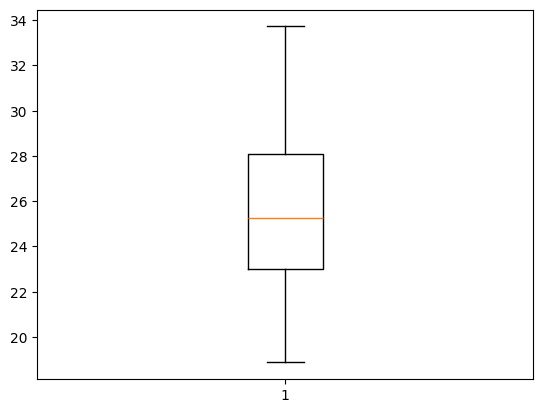

In [61]:
plt.boxplot(mean_temp)
plt.show()

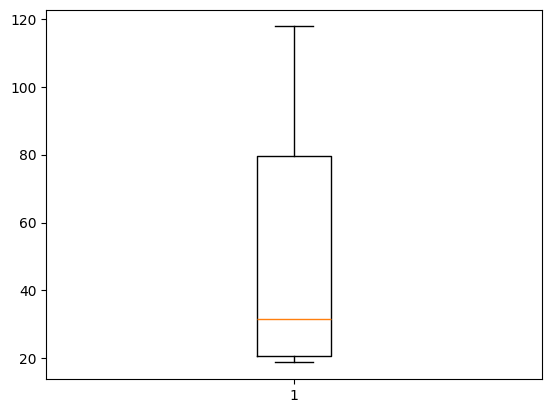

In [62]:
plt.boxplot(mean_n)
plt.show()

In [63]:
crops =list(group_temp.index)
crops

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [64]:
mean_crop_temp = group_temp["mean"].values
mean_crop_temp

array([22.63094241, 27.37679831, 29.97333968, 18.87284675, 27.40989217,
       25.54047682, 23.9889579 , 23.84957512, 24.95837583, 20.11508469,
       24.5090524 , 22.38920391, 31.20877015, 28.19492048, 28.52577474,
       28.66306576, 22.7657255 , 33.72385874, 27.74176223, 21.83784172,
       23.68933221, 25.59176724])

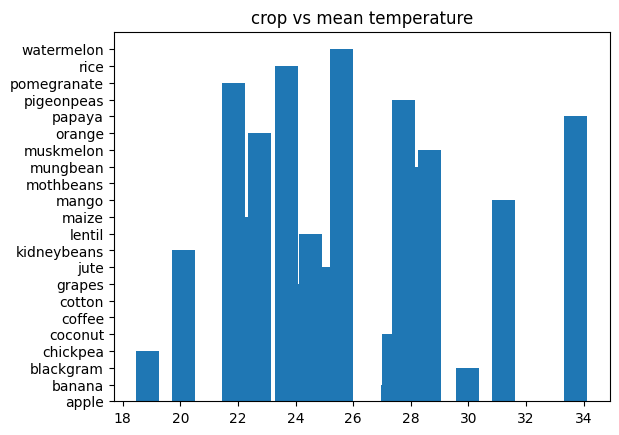

In [65]:
plt.bar(mean_crop_temp,crops)
plt.title("crop vs mean temperature")
plt.show()

In [66]:
max_crop_temp = group_temp["max"].values
max_crop_temp 

array([23.99686172, 29.90888522, 34.9466155 , 20.99502153, 29.8690834 ,
       27.92374437, 25.99237426, 41.94865736, 26.98582182, 24.92360104,
       29.94413861, 26.54986394, 35.99009679, 31.99928579, 29.9145443 ,
       29.94349168, 34.90665289, 43.67549305, 36.97794384, 24.96273236,
       26.92995077, 26.98603693])

In [67]:
min_crop_temp  = group_temp["min"].values
min_crop_temp 

array([21.0365275 , 25.01018457, 25.09737391, 17.02498456, 25.00872392,
       23.05951896, 22.00085141,  8.82567475, 23.09433785, 15.33042636,
       18.06486101, 18.04185513, 27.00315545, 24.01825377, 27.01470397,
       27.02415146, 10.01081312, 23.0124018 , 18.31910448, 18.07132963,
       20.0454142 , 24.04355803])

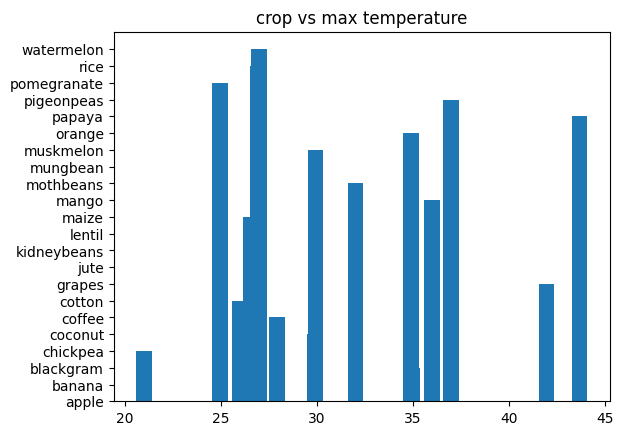

In [68]:
plt.bar(max_crop_temp,crops)
plt.title("crop vs max temperature")
plt.show()

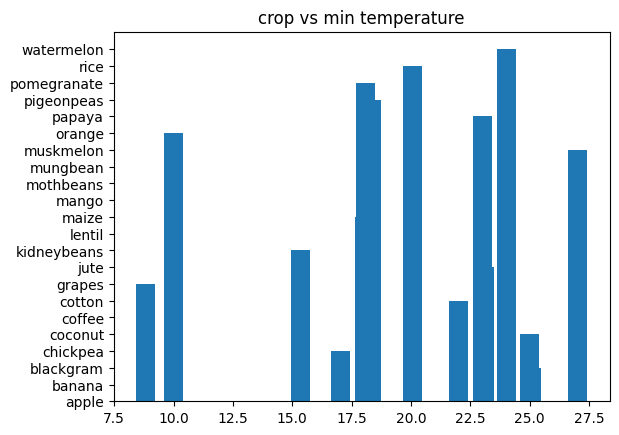

In [69]:
plt.bar(min_crop_temp,crops)
plt.title("crop vs min temperature")
plt.show()

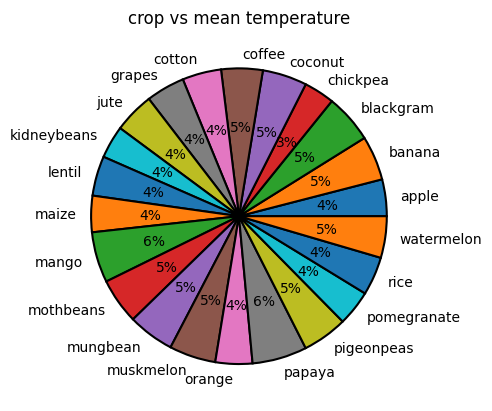

In [70]:
plt.pie(mean_crop_temp,labels=crops,autopct="%1.0f%%",wedgeprops={"ec":"k", "lw":1.5})
plt.title("crop vs mean temperature")
plt.show()

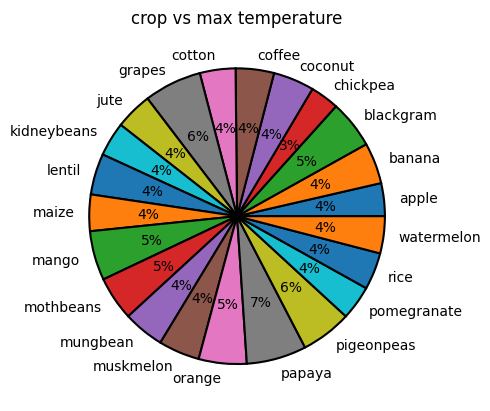

In [71]:
plt.pie(max_crop_temp,labels=crops,autopct="%1.0f%%",wedgeprops={"ec":"k", "lw":1.5})
plt.title("crop vs max temperature")
plt.show()

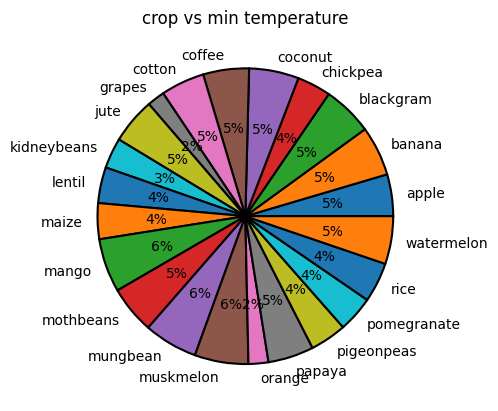

In [72]:
plt.pie(min_crop_temp,labels=crops,autopct="%1.0f%%",wedgeprops={"ec":"k", "lw":1.5})
plt.title("crop vs min temperature")
plt.show()

In [73]:
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


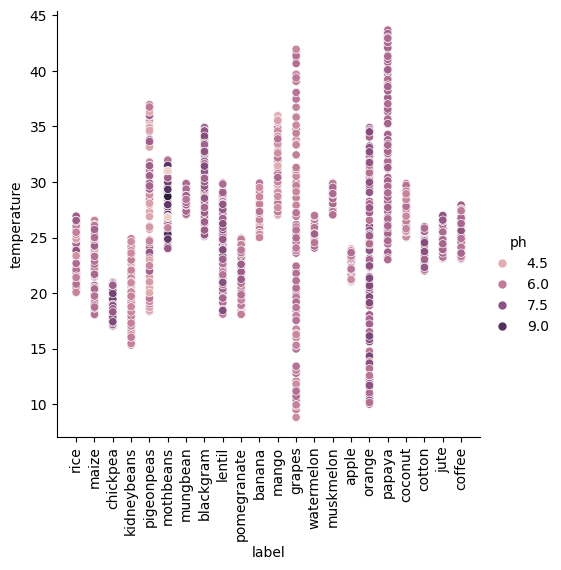

In [74]:
sns.relplot(x="label",y="temperature",data=df,hue="ph")
plt.xticks(rotation=90)
plt.show()

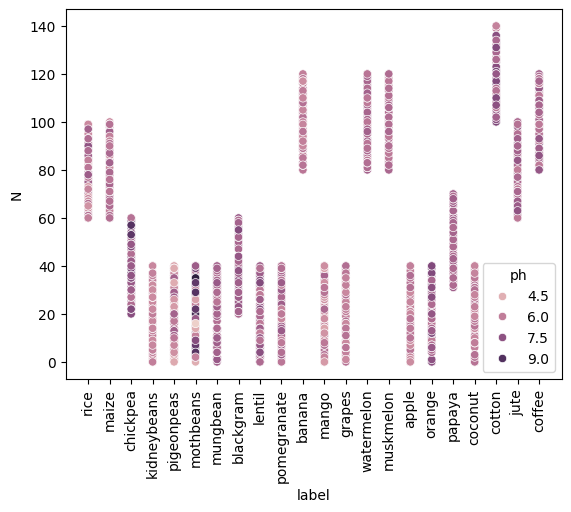

In [75]:
sns.scatterplot(x="label",y="N",data=df,hue="ph")
plt.xticks(rotation=90)
plt.show()

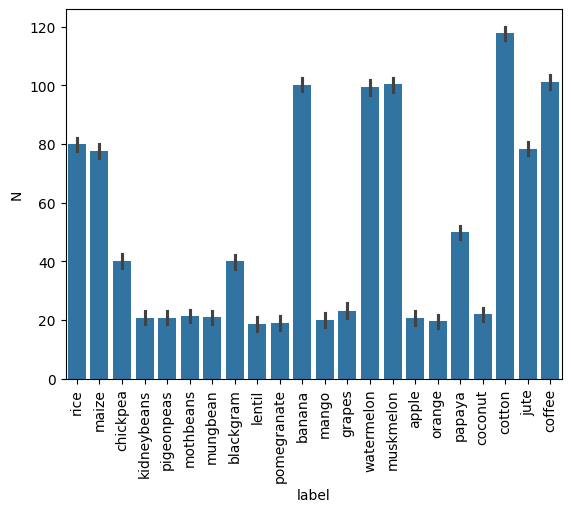

In [76]:
sns.barplot(x="label",y="N",data=df)
plt.xticks(rotation=90)
plt.show()

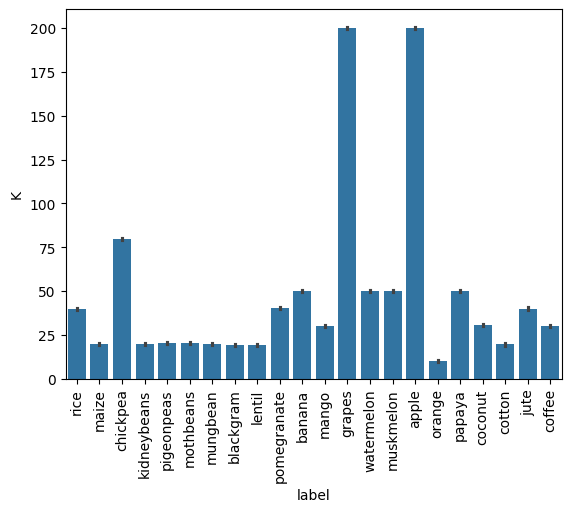

In [77]:
sns.barplot(x="label",y="K",data=df)
plt.xticks(rotation=90)
plt.show()

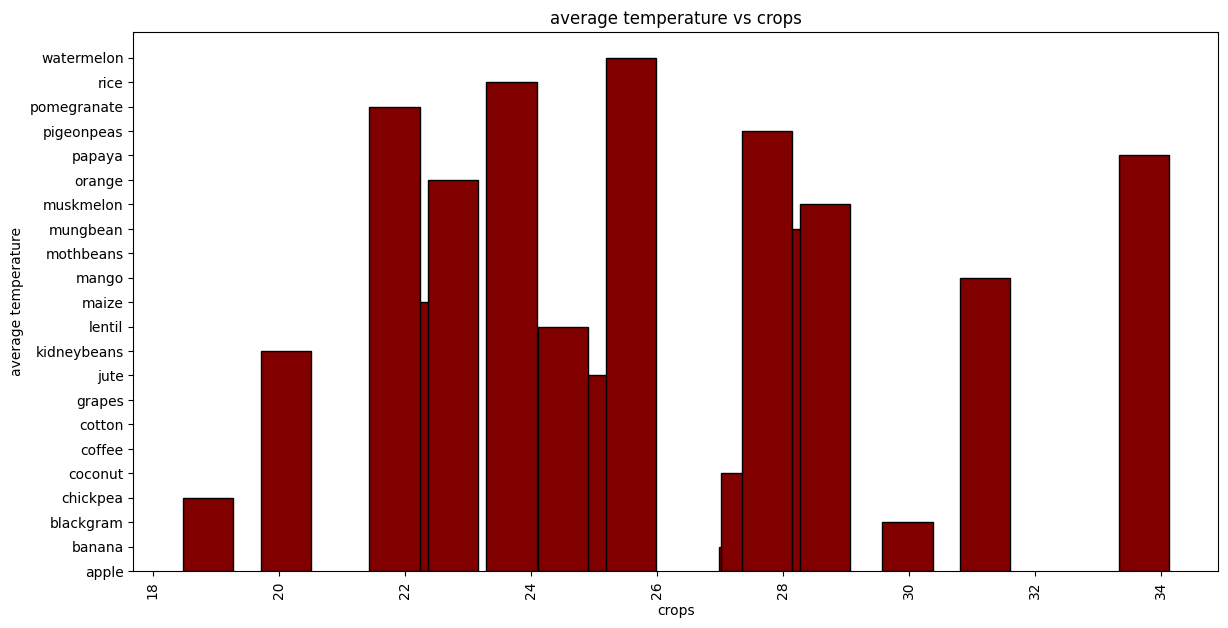

In [78]:
plt.figure(figsize=(14,7))
plt.bar(mean_crop_temp,crops,ec='k',color='maroon')
plt.xlabel('crops')
plt.ylabel('average temperature')
plt.title("average temperature vs crops")
plt.xticks(rotation=90)
plt.show()

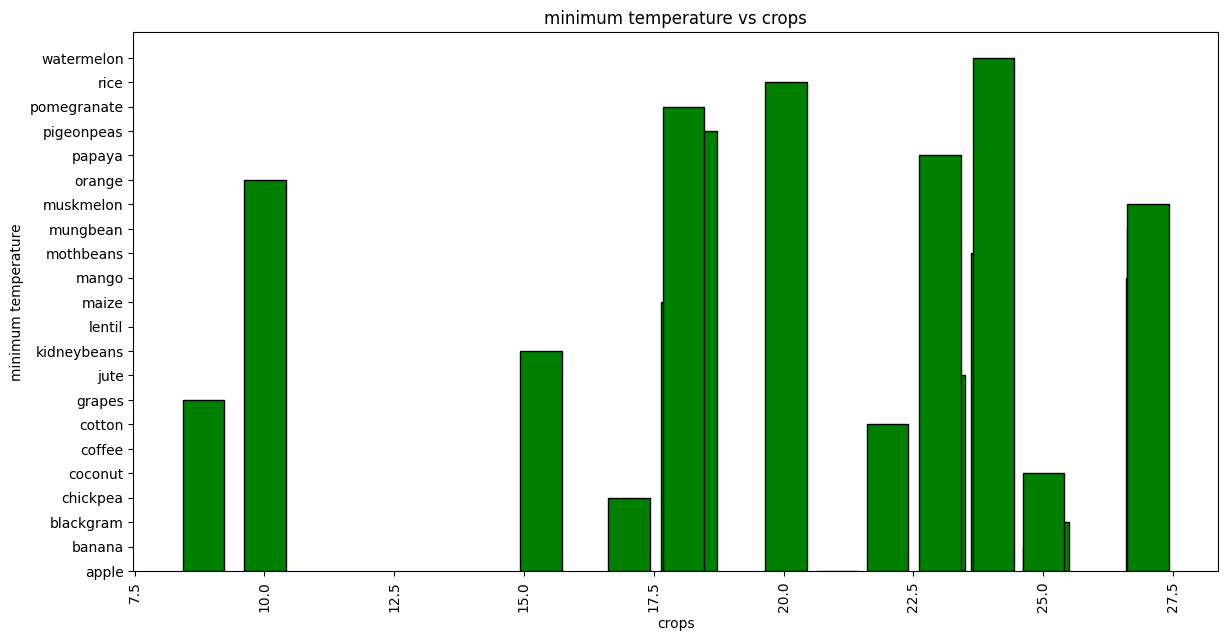

In [79]:
plt.figure(figsize=(14,7))
plt.bar(min_crop_temp,crops,ec='k',color='green')
plt.xlabel('crops')
plt.ylabel('minimum temperature')
plt.title("minimum temperature vs crops")
plt.xticks(rotation=90)
plt.show()

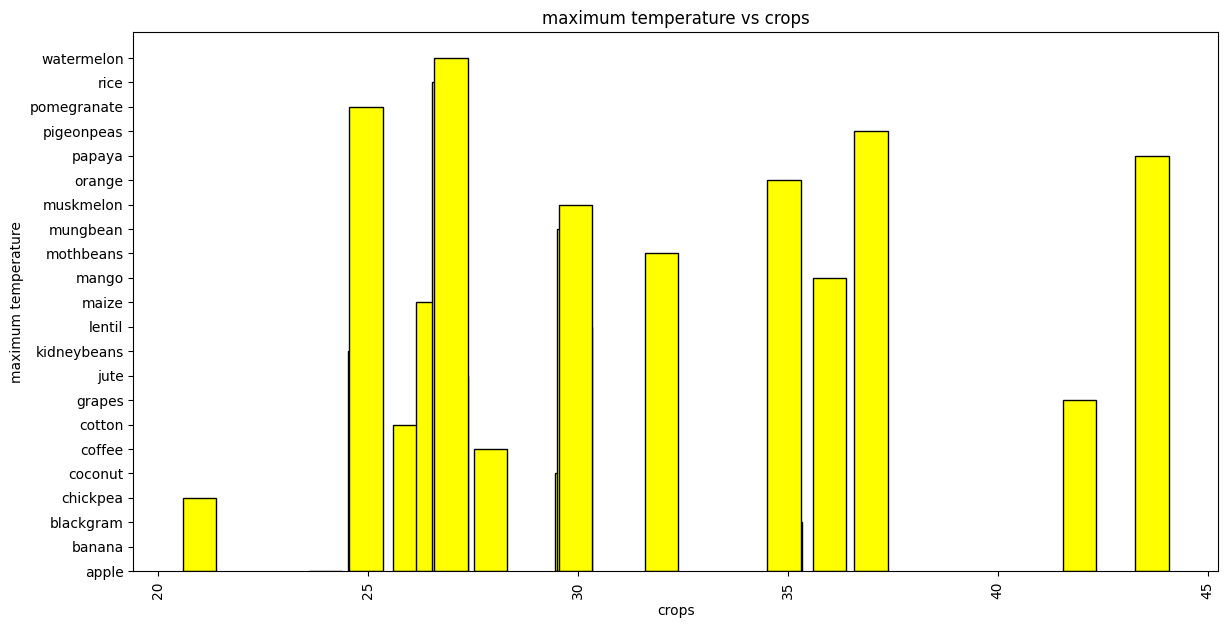

In [80]:
plt.figure(figsize=(14,7))
plt.bar(max_crop_temp,crops,ec='k',color='yellow')
plt.xlabel('crops')
plt.ylabel('maximum temperature')
plt.title("maximum temperature vs crops")
plt.xticks(rotation=90)
plt.show()

<h1>5. Creating x variables.</h1>

In [82]:
x = df.drop("label",axis="columns")
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


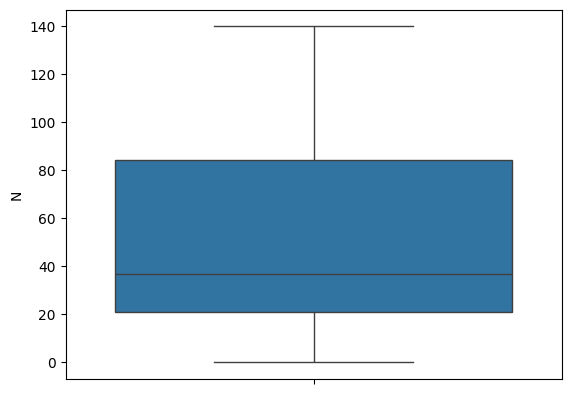

In [83]:
sns.boxplot(df["N"])
plt.show()
# domain knowledge

In [86]:
import warnings
warnings.filterwarnings("ignore")

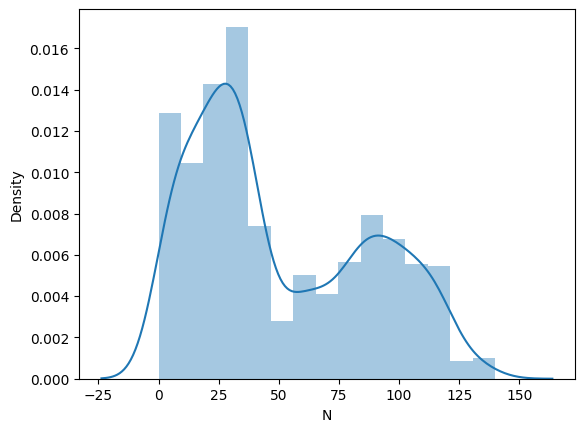

In [87]:
sns.distplot(df["N"])
plt.show()

<h1>6. Normalization of outliers. </h1>

In [91]:
# to normalize the outliers  
# transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
x_transformed = std.fit_transform(x)

In [92]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [95]:
print("Total numner of clay samples : " ,x_transformed.shape[0])

Total numner of clay samples :  2200


<h1>7. Training and Testing spliting.</h1>

In [97]:
train = x_transformed[:2100]
test = x_transformed[2100:]

In [99]:
# unsupervised clustering algorithm
# n_cluster = 8 (by default) ---> into 8 groups
from sklearn.cluster import KMeans
obj = KMeans()

In [100]:
# algorithm fitted on training data
obj.fit(train)

KMeans()

<h1>8. Prediction</h1>

In [104]:
# prediction
clust = obj.labels_

In [108]:
testing_df = x[:2100]

In [109]:
testing_df["cluster"] = clust

In [110]:
testing_df

,N,P,K,temperature,humidity,ph,rainfall,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,3
...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,3
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,3
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,3
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,3


In [112]:
testing_df["label"] = df[:2100]["label"]

In [113]:
testing_df.head()

,N,P,K,temperature,humidity,ph,rainfall,cluster,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,3,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,3,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,3,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,3,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,3,rice


In [116]:
testing_df["cluster"].nunique()

8

In [117]:
testing_df["cluster"].value_counts()

cluster
3    520
4    446
0    317
1    219
5    200
6    198
2    164
7     36
Name: count, dtype: int64

<h1>9. Filtering data. </h1>

In [119]:
fifth_cluster = testing_df[testing_df["cluster"] == 5]
print("Total pointt in the fifth group : ",fifth_cluster.shape[0])

Total pointt in the fifth group :  200


In [122]:
list(fifth_cluster["label"].unique())

['watermelon', 'muskmelon']

<h1>10. Determining Score.</h1>

In [123]:
obj.score(train,clust)
# training time

-5030.11468598983

In [124]:
from sklearn.metrics import silhouette_score

In [126]:
silhouette_score(train,clust)*100
# -1 to 1

np.float64(29.516399072361647)

<h1>11. Saving objects.</h1>

In [127]:
import os, joblib

In [129]:
os.makedirs("models",exist_ok=True)
joblib.dump(obj,"./models/kmeans_model")

['./models/kmeans_model']

In [130]:
app_data = testing_df[["cluster","label"]]
app_data.head()

,cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice


In [131]:
app_data.to_csv("./models/add_data.csv", index=False)

In [132]:
joblib.dump(std,"./models/standard_scaler")

['./models/standard_scaler']

In [ ]:
# AI farmer assitence model
# home page --> image ,  project title, self details ,project details, contact section ---> linkedin , thankyou
# go to project button , project page ---> all parameters , submit button 
# backend --> standard scaler , pass through algorithm, prediction (cluster no.)
# load app_data , filtering fifth cluster , unique labels
# output page ---> crop name and image  